In [1]:
!pip install xgboost

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/bonus_project_dataset.csv')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.dropna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


**Categorical Encoding**

In [6]:
le = LabelEncoder()
data['Airline'] = le.fit_transform(data['Airline'])
data['Total_Stops'] = le.fit_transform(data['Total_Stops'])
data['Additional_Info'] = le.fit_transform(data['Additional_Info'])
data['Source'] = le.fit_transform(data['Source'])
data['Destination'] = le.fit_transform(data['Destination'])
data['Route'] = le.fit_transform(data['Route'])

In [7]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,18,22:20,01:10 22 Mar,2h 50m,4,8,3897
1,1,1/05/2019,3,0,84,05:50,13:15,7h 25m,1,8,7662
2,4,9/06/2019,2,1,118,09:25,04:25 10 Jun,19h,1,8,13882
3,3,12/05/2019,3,0,91,18:05,23:30,5h 25m,0,8,6218
4,3,01/03/2019,0,5,29,16:50,21:35,4h 45m,0,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,0,64,19:55,22:25,2h 30m,4,8,4107
10679,1,27/04/2019,3,0,64,20:45,23:20,2h 35m,4,8,4145
10680,4,27/04/2019,0,2,18,08:20,11:20,3h,4,8,7229
10681,10,01/03/2019,0,5,18,11:30,14:10,2h 40m,4,8,12648


**Data Preprocessing**

In [8]:
data['Duration'] = data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

data["Journey_day"] = data['Date_of_Journey'].str.split('/').str[0].astype(int)
data["Journey_month"] = data['Date_of_Journey'].str.split('/').str[1].astype(int)
data = data.drop(['Date_of_Journey'], axis='columns')

data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data = data.drop(['Dep_Time'], axis='columns')

data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute
data = data.drop(['Arrival_Time'], axis='columns')

In [9]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,4,8,3897,24,3,22,20,1,10
1,1,3,0,84,445,1,8,7662,1,5,5,50,13,15
2,4,2,1,118,1140,1,8,13882,9,6,9,25,4,25
3,3,3,0,91,325,0,8,6218,12,5,18,5,23,30
4,3,0,5,29,285,0,8,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,8,4107,9,4,19,55,22,25
10679,1,3,0,64,155,4,8,4145,27,4,20,45,23,20
10680,4,0,2,18,180,4,8,7229,27,4,8,20,11,20
10681,10,0,5,18,160,4,8,12648,1,3,11,30,14,10


**Descriptive Statistics**

In [10]:
data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Airline,10683.000000,3.965927,2.352155,0.000000,3.000000,4.000000,4.000000,11.000000
Source,10683.000000,1.952261,1.177221,0.000000,2.000000,2.000000,3.000000,4.000000
Destination,10683.000000,1.436113,1.474782,0.000000,0.000000,1.000000,2.000000,5.000000
Route,10683.000000,74.825143,36.730924,0.000000,48.000000,73.000000,104.000000,128.000000
Duration,10683.000000,643.093232,507.862001,5.000000,170.000000,520.000000,930.000000,2860.000000
Total_Stops,10683.000000,1.458579,1.806560,0.000000,0.000000,0.000000,4.000000,5.000000
Additional_Info,10683.000000,7.393054,1.214211,0.000000,8.000000,8.000000,8.000000,9.000000
Price,10683.000000,9087.064121,4611.359167,1759.000000,5277.000000,8372.000000,12373.000000,79512.000000
Journey_day,10683.000000,13.508378,8.479277,1.000000,6.000000,12.000000,21.000000,27.000000
Journey_month,10683.000000,4.708602,1.164357,3.000000,3.000000,5.000000,6.000000,6.000000


In [11]:
x = data.drop(['Price'], axis='columns')
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,4,8,24,3,22,20,1,10
1,1,3,0,84,445,1,8,1,5,5,50,13,15
2,4,2,1,118,1140,1,8,9,6,9,25,4,25
3,3,3,0,91,325,0,8,12,5,18,5,23,30
4,3,0,5,29,285,0,8,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,8,9,4,19,55,22,25
10679,1,3,0,64,155,4,8,27,4,20,45,23,20
10680,4,0,2,18,180,4,8,27,4,8,20,11,20
10681,10,0,5,18,160,4,8,1,3,11,30,14,10


In [12]:
y = data['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

 **Splitting** 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**Models**

In [14]:
scores = []

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_scores = cross_val_score(rfr, x, y, cv=5)
scores.append(rfr_scores.mean())

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr_scores = cross_val_score(gbr, x, y, cv=5)
scores.append(gbr_scores.mean())

xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)
xgb_scores = cross_val_score(xgb, x, y, cv=5)
scores.append(xgb_scores.mean())

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_scores = cross_val_score(dtr, x, y, cv=5)
scores.append(dtr_scores.mean())

[16:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
model_names = ['Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBRegressor', 'Decision Tree Regressor']

In [16]:
scores

[0.8835261708999045,
 0.8226850740410194,
 0.8185420319489177,
 0.7870711396739778]

In [17]:
model_scores = pd.DataFrame({'Model Name': model_names, 'Accuracy Scores': scores})
model_scores.sort_values(by='Accuracy Scores', ascending=False)

,Model Name,Accuracy Scores
0,Random Forest Regressor,0.883526
1,Gradient Boosting Regressor,0.822685
2,XGBRegressor,0.818542
3,Decision Tree Regressor,0.787071


**Data Analysis**

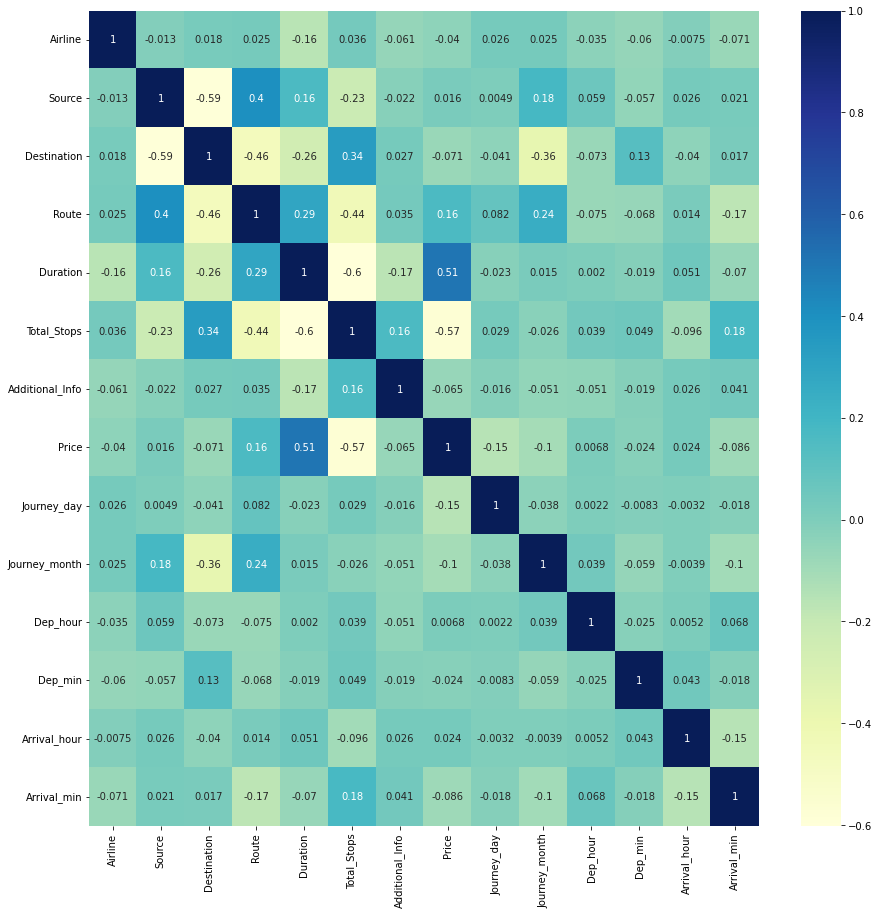

In [18]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap = "YlGnBu", annot = True)
plt.show()

**Grid Search CV**

In [54]:
scores_gcv = []

In [32]:
param_grid_rfr = {'max_depth':[None,1,2,3], 'n_estimators':[80,90,100], 'max_samples':[700,800,900,1000], 'min_samples_split':[2,4,6,8]}

rfr_gcv = GridSearchCV(rfr, param_grid_rfr, cv=3)

In [33]:
rfr_gcv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 1, 2, 3],
                         'max_samples': [700, 800, 900, 1000],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [80, 90, 100]})

In [34]:
rfr_gcv.score(x_test, y_test)

0.7921769221855428

In [55]:
scores_gcv.append(rfr_gcv.score(x_test, y_test))

In [38]:
param_grid_gbr = {'alpha':[0.8,0.9,1], 'n_estimators':[90,100,110], 'max_depth':[4,5,6], 'learning_rate':[0.1,0,2], 'min_samples_split':[1,2,3], 'min_samples_leaf':[1,2,3]}

gbr_gcv = GridSearchCV(gbr, param_grid_gbr, cv=3)

In [39]:
gbr_gcv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1539 fits failed out of a total of 2187.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.8, 0.9, 1], 'learning_rate': [0.1, 0, 2],
                         'max_depth': [4, 5, 6], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [90, 100, 110]})

In [40]:
gbr_gcv.score(x_test, y_test)

0.9037477971440256

In [56]:
scores_gcv.append(gbr_gcv.score(x_test, y_test))

In [44]:
param_grid_xgb = {'min_child_weight': [1, 3, 5, 7, 9], 'gamma': [0.5, 1, 1.5, 2, 2.5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]}

xgb_gcv = GridSearchCV(xgb, param_grid_xgb, cv=3)

In [45]:
xgb_gcv.fit(x_train, y_train)

[17:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 2.5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 3, 5, 7, 9],
                         'subsample': [0.6, 0.8, 1.0]})

In [46]:
xgb_gcv.score(x_test, y_test)

0.8941730952316286

In [57]:
scores_gcv.append(xgb_gcv.score(x_test, y_test))

In [41]:
param_grid_dtr={'splitter':["best","random"], 'max_depth' : [1,3,5,7], 'min_samples_leaf':[2,4,6,8,10], 'min_weight_fraction_leaf':[0.1,0.2,0.3], 'max_features':[None, "auto","log2","sqrt"], 'max_leaf_nodes':[80,90,100] }

dtr_gcv = GridSearchCV(dtr, param_grid_dtr, cv=3)

In [42]:
dtr_gcv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'max_features': [None, 'auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [80, 90, 100],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3],
                         'splitter': ['best', 'random']})

In [43]:
dtr_gcv.score(x_test, y_test)

0.49685420529930147

In [58]:
scores_gcv.append(dtr_gcv.score(x_test, y_test))

In [59]:
scores_gcv

[0.7921769221855428,
 0.9037477971440256,
 0.8941730952316286,
 0.49685420529930147]

In [60]:
model_scores = pd.DataFrame({'Model Name': model_names, 'Accuracy Scores': scores_gcv})
model_scores.sort_values(by='Accuracy Scores', ascending=False)

,Model Name,Accuracy Scores
1,Gradient Boosting Regressor,0.903748
2,XGBRegressor,0.894173
0,Random Forest Regressor,0.792177
3,Decision Tree Regressor,0.496854
